In [1]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import requests
from datetime import datetime, timedelta
import time

In [2]:
'''Get VCB Exchange Rate from date to date'''

def GetVCBExchangeRate(firstdate, enddate):
    
    VCB_ER_df=pd.DataFrame()
    date_delta_interval = (enddate-firstdate).days + 1

    for i in range(date_delta_interval):
#         print(i)
        next_date = first_date +timedelta(days=i)
        next_date_str = next_date.strftime('%d/%m/%Y')
        url = "https://portal.vietcombank.com.vn/UserControls/TVPortal.TyGia/pListTyGia.aspx"

        querystring = {"txttungay":next_date_str,"BacrhID":"1","isEn":"True"}

        payload = ""
        headers = {}

        response = requests.request("GET", url, data=payload, headers=headers, params=querystring)
        try: 
            df = pd.read_html(response.text)[0]
        except ValueError:
            pass
        else: 
            df.columns = df.columns.droplevel(level=0)
            df.rename(columns={'Cash': 'Bid Cash','Transfer':'Bid Transfer', 'Selling Rates':'Ask'},inplace=True)
            df['Spread']=df['Ask']-df['Bid Transfer']
            df['Date']=next_date
            VCB_ER_df=VCB_ER_df.append(df)

        if i%100 == 0: 
            time.sleep(6)
        else:
            if i%10 == 0: time.sleep(3)
            
    return VCB_ER_df

In [4]:
year = 2022
first_date = datetime(year,7,1).date()
end_date = datetime(year,7,26).date()
result = GetVCBExchangeRate(first_date, end_date)
result.to_csv('VCB Exchange Rate {}.csv'.format(year))
result

,Currency Name,Currency Code,Bid Cash,Bid Transfer,Ask,Spread,Date
0,AUSTRALIAN DOLLAR,AUD,15459.54,15615.70,16105.12,489.42,2022-07-01
1,CANADIAN DOLLAR,CAD,17589.12,17766.79,18323.64,556.85,2022-07-01
2,SWISS FRANC,CHF,23712.27,23951.79,24702.48,750.69,2022-07-01
3,YUAN RENMINBI,CNY,3407.18,3441.60,3550.00,108.40,2022-07-01
4,DANISH KRONE,DKK,-,3215.58,3336.32,120.74,2022-07-01
...,...,...,...,...,...,...,...
15,SAUDI RIAL,SAR,-,6198.35,6447.03,248.68,2022-07-26
16,SWEDISH KRONA,SEK,-,2244.47,2340.09,95.62,2022-07-26
17,SINGAPORE DOLLAR,SGD,16428.65,16594.59,17129.32,534.73,2022-07-26
18,THAILAND BAHT,THB,563.20,625.78,649.84,24.06,2022-07-26


In [5]:
result.to_csv('VCB Exchange Rate Jan-Jul 2022.csv')

In [6]:
USD_df = result[result['Currency Code']=="USD"]
USD_df.set_index('Date',inplace=True)
USD_df.tail()

,Currency Name,Currency Code,Bid Cash,Bid Transfer,Ask,Spread
Date,,,,,,
2022-07-22,US DOLLAR,USD,23240.00,23270.0,23550.0,280.0
2022-07-23,US DOLLAR,USD,23240.00,23270.0,23550.0,280.0
2022-07-24,US DOLLAR,USD,23240.00,23270.0,23550.0,280.0
2022-07-25,US DOLLAR,USD,23220.00,23250.0,23530.0,280.0
2022-07-26,US DOLLAR,USD,23185.00,23215.0,23495.0,280.0


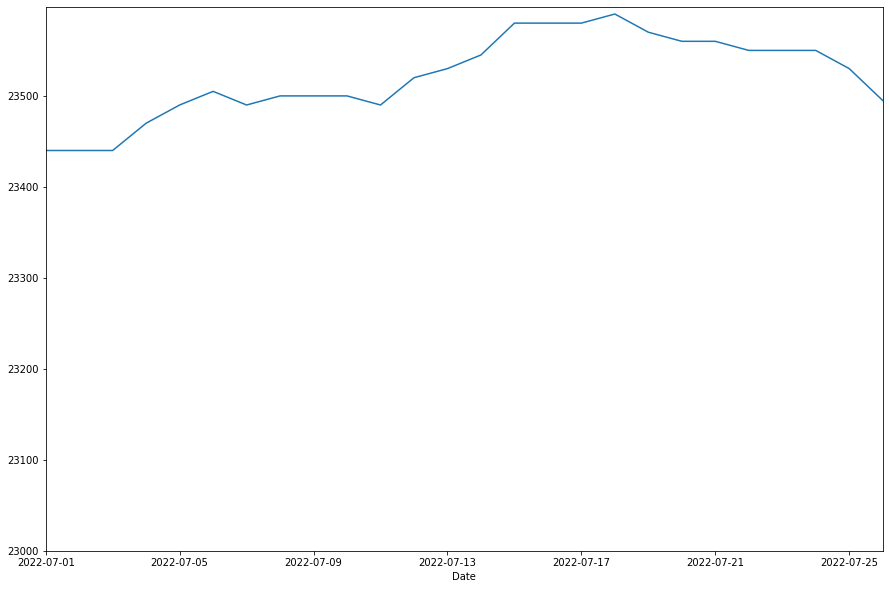

In [20]:
plt.figure(figsize=(15,10))
USD_df['Ask'].plot()
plt.ylim(bottom=23000)
plt.show()